In [1]:
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
import gradio as gr

c:\Users\KaranJoshi\Projects\Document-Processing-Agent\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
load_dotenv(override=True)

True

In [10]:
from typing import Annotated
from langchain.chat_models import init_chat_model

In [9]:
import os

GEMINI_BASE_URL = os.getenv("GEMINI_BASE_URL")
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [5]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [6]:
graph_builder = StateGraph(State)

In [11]:
llm = init_chat_model("google_genai:gemini-2.5-flash-lite")

In [12]:
def chatbot(state: State) -> State:
    return {"messages": llm.invoke(state["messages"])}

In [ ]:
graph_builder.add_node("chatbot", chatbot)

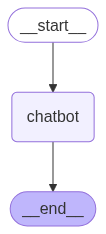

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(f"Error: {e}")
    pass

In [ ]:
from langgraph.config import get_stream_writer

def chat(user_input, history):
    initial_state = State(messages={"role": "user", "content": user_input})
    response = ""
    for message_chunk, metadata in graph.stream(initial_state, stream_mode="messages"):
        if message_chunk.content:
            response += message_chunk.content
            yield response

gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\KaranJoshi\Projects\Document-Processing-Agent\.venv\Lib\site-packages\langchain_core\messages\utils.py", line 334, in _convert_to_message
    msg_content = msg_kwargs.pop("content") or ""
                  ~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: 'content'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\KaranJoshi\Projects\Document-Processing-Agent\.venv\Lib\site-packages\gradio\queueing.py", line 626, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "c:\Users\KaranJoshi\Projects\Document-Processing-Agent\.venv\Lib\site-packages\gradio\route_utils.py", line 350, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<11 lines>...
    )
    ^
  File "c:\Users\KaranJoshi\Projects\Document-Pr